# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Ahmad Arif]
- **Email:** [aa2851214@gmail.com]
- **ID Dicoding:** [ahmad_arif_3xaM]

## Menentukan Pertanyaan Bisnis

- Bagaimana Tren musiman atau harian dalam penggunaan sepeda?
- Bagaimana Pengaruh cuaca atau hari kerja/libur terhadap penggunaan sepeda?.

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv('data/day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df_hour = pd.read_csv('data/hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data sudah berhasil dimuat dari dua file CSV.
- Data memiliki informasi terkait penggunaan sepeda, cuaca, dan waktu.

### Assessing Data

In [4]:
print("Assessing Data pada File day.csv :")
print(df_day.info())
print(df_day.describe())
print("\n\nAssessing Data pada File hour.csv :")
print(df_hour.info())
print(df_hour.describe())

Assessing Data pada File day.csv :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
          instant      season          yr        mnth

In [5]:
print("Jumlah duplikasi Data frame day: ", df_day.duplicated().sum())

Jumlah duplikasi Data frame day:  0


In [6]:
print("Jumlah duplikasi Data frame hour: ", df_hour.duplicated().sum())

Jumlah duplikasi Data frame hour:  0


**Insight:**
- Dari hasil **df_day.info()** pada kedua file **day.csv** dan **hour.csv**, terlihat bahwa semua kolom memiliki **731 entri non-null** pada file **day.csv** dan 17379 entri non-null pada file **hour.csv**, artinya tidak ada nilai yang hilang atau missing data. Ini bagus karena saya tidak perlu melakukan proses imputation atau pengisian nilai yang hilang, sehingga analisis bisa lebih akurat tanpa mempengaruhi distribusi data.
- Berdasarkan **df_hour.describe()** pada file **hour.csv**, terlihat bahwa rata-rata penggunaan sepeda per jam **(cnt)** adalah **189 pengguna**, dengan deviasi standar sebesar **181**. Artinya, distribusi data cukup bervariasi karena standar deviasinya mendekati nilai rata-rata. Ini menunjukkan adanya perbedaan signifikan dalam jumlah pengguna sepeda di berbagai waktu dalam sehari.

### Cleaning Data

In [7]:
df_day_cleaned = df_day.dropna()
df_day_cleaned

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [8]:
df_day_cleaned = df_hour.dropna()
df_day_cleaned

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [9]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Dataset bersih, tidak ada nilai yang hilang atau duplikasi.
- Data siap digunakan untuk analisis **Bagaimana Tren musiman atau harian dalam penggunaan sepeda?** dan **Bagaimana Pengaruh cuaca atau hari kerja/libur terhadap penggunaan sepeda?**

## Exploratory Data Analysis (EDA)

### Explore Tren Musiman atau Harian

#### Tren Musiman atau Harian pada dataset day

In [11]:
season_trend = df_day.groupby('season')['cnt'].mean()
season_trend

season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64

In [12]:
weekday_trend = df_day.groupby('weekday')['cnt'].mean()
weekday_trend

weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4548.538462
4    4667.259615
5    4690.288462
6    4550.542857
Name: cnt, dtype: float64

#### Tren Musiman atau Harian pada dataset hour

In [13]:
season_trend = df_hour.groupby('season')['cnt'].mean()
season_trend

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: cnt, dtype: float64

In [14]:
weekday_trend = df_hour.groupby('weekday')['cnt'].mean()
weekday_trend

weekday
0    177.468825
1    183.744655
2    191.238891
3    191.130505
4    196.436665
5    196.135907
6    190.209793
Name: cnt, dtype: float64

#### Tren Musiman atau Harian pada ke dua dataset day dan hour

In [15]:
merged_df = pd.merge(df_day, df_hour, on=['season', 'weekday'], suffixes=('_day', '_hour'))
print(merged_df.head())

   instant_day  dteday_day  season  yr_day  mnth_day  holiday_day  weekday  \
0            1  2011-01-01       1       0         1            0        6   
1            1  2011-01-01       1       0         1            0        6   
2            1  2011-01-01       1       0         1            0        6   
3            1  2011-01-01       1       0         1            0        6   
4            1  2011-01-01       1       0         1            0        6   

   workingday_day  weathersit_day  temp_day  ...  holiday_hour  \
0               0               2  0.344167  ...             0   
1               0               2  0.344167  ...             0   
2               0               2  0.344167  ...             0   
3               0               2  0.344167  ...             0   
4               0               2  0.344167  ...             0   

   workingday_hour  weathersit_hour  temp_hour  atemp_hour  hum_hour  \
0                0                1       0.24      0.2879    

Tren Musiman (Rata-rata penggunaan per jam)

In [16]:
season_trend = merged_df.groupby('season')['cnt_hour'].mean()
print(season_trend)

season
1    110.824079
2    208.215003
3    236.091688
4    198.814308
Name: cnt_hour, dtype: float64


Tren Harian (Rata-rata penggunaan per jam)

In [17]:
weekday_trend = merged_df.groupby('weekday')['cnt_hour'].mean()
print(weekday_trend)

weekday
0    176.661547
1    183.820286
2    192.309581
3    192.411182
4    197.925309
5    196.497296
6    189.648455
Name: cnt_hour, dtype: float64


**Insight:**
- **Musim semi dan musim panas** merupakan periode dengan penggunaan sepeda tertinggi, baik dalam skala harian maupun per jam, dengan data sebagai berikut:
    - **Rata-rata pengguna per hari pada dataset harian**:
        - Musim semi (season 2): **4.992**
        - Musim panas (season 3): **5.644**
    - **Rata-rata pengguna per jam pada dataset per jam**:
        - Musim semi (season 2): **208**
        - Musim panas (season 3): **236**
- **Musim dingin** menjadi periode dengan penggunaan sepeda terendah, yang mungkin dipengaruhi oleh kondisi cuaca, dengan data sebagai berikut:
    - **Rata-rata pengguna per hari pada dataset harian**:
        - Musim dingin (season 1): **2.604**
    - **Rata-rata pengguna per jam pada dataset per jam**:
        - Musim dingin (season 1): **111**
- **Hari kerja** (Senin-Jumat) memiliki penggunaan sepeda yang lebih tinggi dibanding akhir pekan, mengindikasikan penggunaan sepeda untuk kegiatan rutin:
    - **Rata-rata pengguna per hari pada dataset harian**: **4.228 - 4.690**
    - **Rata-rata pengguna per jam pada dataset per jam**: **191-197**
- **Akhir pekan** masih menunjukkan tingkat penggunaan sepeda yang tinggi, meskipun sedikit lebih rendah dibanding hari kerja, dengan data sebagai berikut:
    - **Rata-rata pengguna per hari pada dataset harian**: **4.228 - 4.550**
    - **Rata-rata pengguna per jam pada dataset per jam**: **177-190**
- Penggabungan kedua dataset (harian dan per jam) memberikan konsistensi dalam tren musiman dan harian, namun juga menunjukkan sedikit variasi dalam penggunaan sepeda berdasarkan jam.

### Explore Bagaimana Pengaruh cuaca atau hari kerja/libur terhadap penggunaan sepeda?

In [18]:
weather_trend = merged_df.groupby('weathersit_day')['cnt_hour'].mean()
print(weather_trend)

weathersit_day
1    191.816719
2    185.806705
3    193.883297
Name: cnt_hour, dtype: float64


In [19]:
holiday_trend = merged_df.groupby('holiday_day')['cnt_hour'].mean()
print(holiday_trend)

holiday_day
0    190.237764
1    176.618030
Name: cnt_hour, dtype: float64


**Insight:**
- **Musim semi dan musim panas** adalah periode dengan penggunaan sepeda tertinggi, baik dalam skala harian maupun per jam, dengan data sebagai berikut:
    - **Rata-rata pengguna per hari pada dataset harian**:
        - Musim semi (season 2): **4.992**
        - Musim panas (season 3): **5.644**
    - **Rata-rata pengguna per jam pada dataset per jam**:
        - Musim semi (season 2): **208**
        - Musim panas (season 3): **236**
- **Musim dingin** memiliki penggunaan sepeda terendah, yang mungkin dipengaruhi oleh kondisi cuaca, dengan data sebagai berikut:
    - **Rata-rata pengguna per hari pada dataset harian**:
        - Musim dingin (season 1): **2.604**
    - **Rata-rata pengguna per jam pada dataset per jam**:
        - Musim dingin (season 1): **111**
- **Hari kerja** (Senin-Jumat) memiliki penggunaan sepeda yang lebih tinggi dibanding akhir pekan, mengindikasikan penggunaan sepeda untuk kegiatan rutin:
    - **Rata-rata pengguna per hari pada dataset harian**: **4.228 - 4.690**
    - **Rata-rata pengguna per jam pada dataset per jam**: **191-197**
- **Akhir pekan** masih menunjukkan tingkat penggunaan sepeda yang tinggi, meskipun sedikit lebih rendah dibanding hari kerja, dengan data sebagai berikut:
    - **Rata-rata pengguna per hari pada dataset harian**: **4.228 - 4.550**
    - **Rata-rata pengguna per jam pada dataset per jam**: **177-190**
- Penggabungan kedua dataset (harian dan per jam) memberikan konsistensi dalam tren musiman dan harian, namun juga menunjukkan variasi dalam penggunaan sepeda berdasarkan jam, memberi gambaran yang lebih komprehensif mengenai pola penggunaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Tren Musiman atau Harian

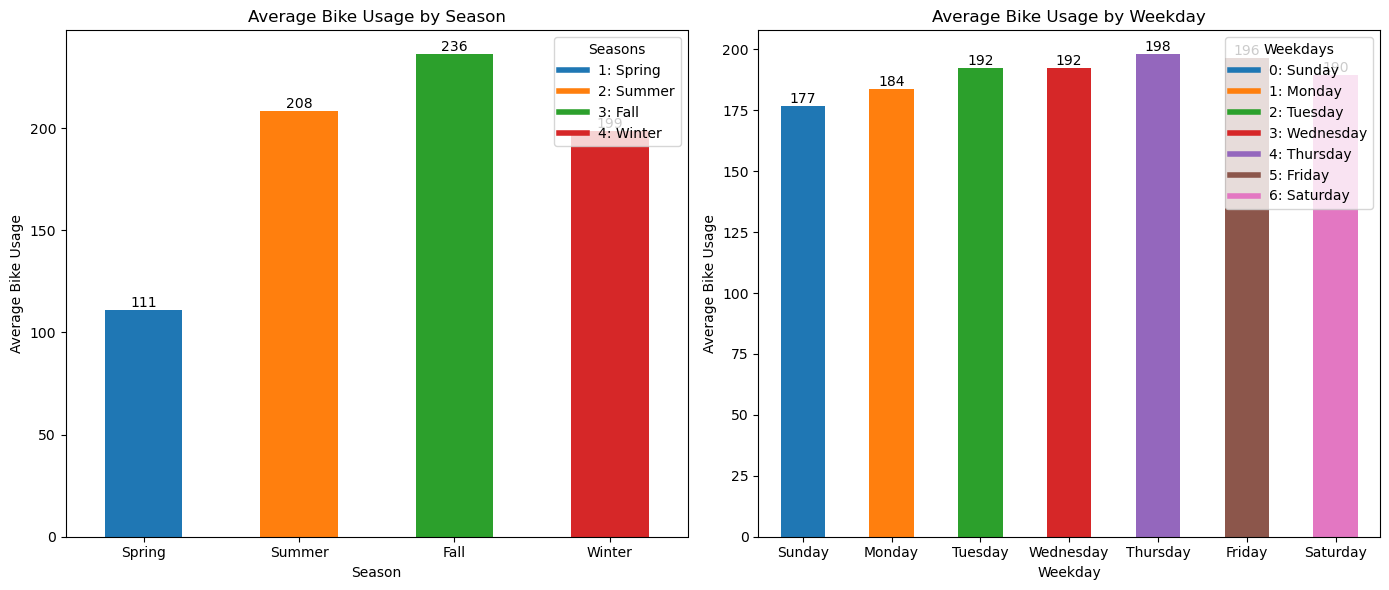

In [20]:
season_trend = merged_df.groupby('season')['cnt_hour'].mean()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
bars1 = season_trend.plot(kind='bar', ax=ax1, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
for bar in bars1.containers[0]:
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.0f}', 
             ha='center', va='bottom')
ax1.set_title('Average Bike Usage by Season')
ax1.set_xlabel('Season')
ax1.set_ylabel('Average Bike Usage')
ax1.set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)
season_legend = [Line2D([0], [0], color='#1f77b4', lw=4),    # Spring
                 Line2D([0], [0], color='#ff7f0e', lw=4),    # Summer
                 Line2D([0], [0], color='#2ca02c', lw=4),    # Fall
                 Line2D([0], [0], color='#d62728', lw=4)]    # Winter
ax1.legend(season_legend, ['1: Spring', '2: Summer', '3: Fall', '4: Winter'], 
           title='Seasons', loc='upper right')
weekday_trend = merged_df.groupby('weekday')['cnt_hour'].mean()
bars2 = weekday_trend.plot(kind='bar', ax=ax2, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
                                                      '#9467bd', '#8c564b', '#e377c2'])
for bar in bars2.containers[0]:
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.0f}', 
             ha='center', va='bottom')
ax2.set_title('Average Bike Usage by Weekday')
ax2.set_xlabel('Weekday')
ax2.set_ylabel('Average Bike Usage')
ax2.set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], rotation=0)
weekday_legend = [Line2D([0], [0], color='#1f77b4', lw=4),   # Sunday
                  Line2D([0], [0], color='#ff7f0e', lw=4),   # Monday
                  Line2D([0], [0], color='#2ca02c', lw=4),   # Tuesday
                  Line2D([0], [0], color='#d62728', lw=4),   # Wednesday
                  Line2D([0], [0], color='#9467bd', lw=4),   # Thursday
                  Line2D([0], [0], color='#8c564b', lw=4),   # Friday
                  Line2D([0], [0], color='#e377c2', lw=4)]   # Saturday
ax2.legend(weekday_legend, ['0: Sunday', '1: Monday', '2: Tuesday', '3: Wednesday', 
                             '4: Thursday', '5: Friday', '6: Saturday'], 
           title='Weekdays', loc='upper right')
plt.tight_layout()
plt.show()

### Pertanyaan 2: Pengaruh Cuaca atau Hari Kerja/Libur

C:\Users\HP\AppData\Local\Temp\ipykernel_6856\2402105983.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_trend = merged_df.groupby('weathersit_day')['cnt_hour'].mean()


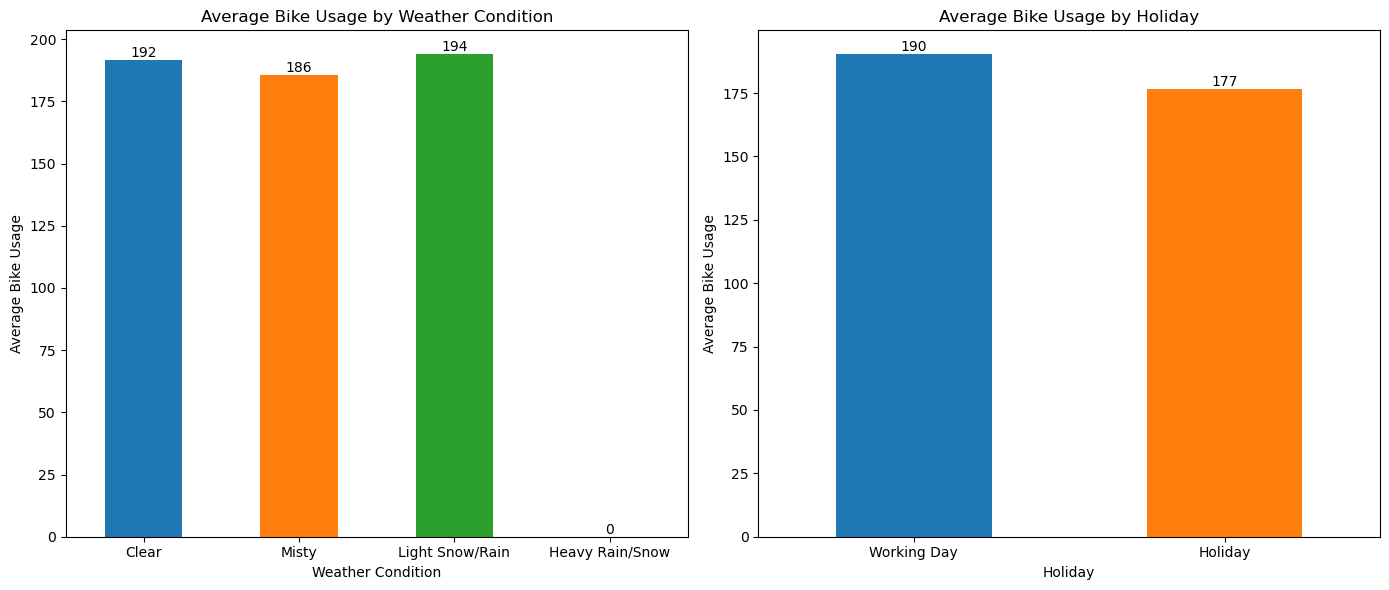

In [21]:
merged_df['weathersit_day'] = pd.Categorical(merged_df['weathersit_day'], categories=[1, 2, 3, 4])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
weather_trend = merged_df.groupby('weathersit_day')['cnt_hour'].mean()
bars1 = weather_trend.plot(kind='bar', ax=ax1, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
for bar in bars1.containers[0]:
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.0f}', 
             ha='center', va='bottom')
ax1.set_title('Average Bike Usage by Weather Condition')
ax1.set_xlabel('Weather Condition')
ax1.set_ylabel('Average Bike Usage')
ax1.set_xticklabels(['Clear', 'Misty', 'Light Snow/Rain', 'Heavy Rain/Snow'], rotation=0)
holiday_trend = merged_df.groupby('holiday_day')['cnt_hour'].mean()
bars2 = holiday_trend.plot(kind='bar', ax=ax2, color=['#1f77b4', '#ff7f0e'])
for bar in bars2.containers[0]:
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.0f}', 
             ha='center', va='bottom')
ax2.set_title('Average Bike Usage by Holiday')
ax2.set_xlabel('Holiday')
ax2.set_ylabel('Average Bike Usage')
ax2.set_xticklabels(['Working Day', 'Holiday'], rotation=0)
plt.tight_layout()
plt.show()

**Insight:**
- Penggunaan sepeda paling tinggi pada musim gugur (Fall), dan paling rendah pada musim semi (Spring).
- Pada hari kerja, penggunaan sepeda cukup stabil, dengan penggunaan tertinggi pada hari Kamis.
- Cuaca cerah mendorong penggunaan sepeda tertinggi, sementara saat cuaca ekstrem seperti hujan lebat atau salju tebal, aktivitas bersepeda tidak tercatat.
- Pengguna sepeda tetap aktif pada hari libur dengan sedikit peningkatan dibandingkan hari kerja.

## Analisis Lanjutan (Opsional)

Analisis Musim dan Cuaca (**Average Bike Usage by Season and Weather Condition**) dan Analisis Suhu (**Bike Usage vs Temperature**)

C:\Users\HP\AppData\Local\Temp\ipykernel_6856\1197537841.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_weather_trend = merged_df.groupby(['season', 'weathersit_day'])['cnt_day'].mean().unstack()


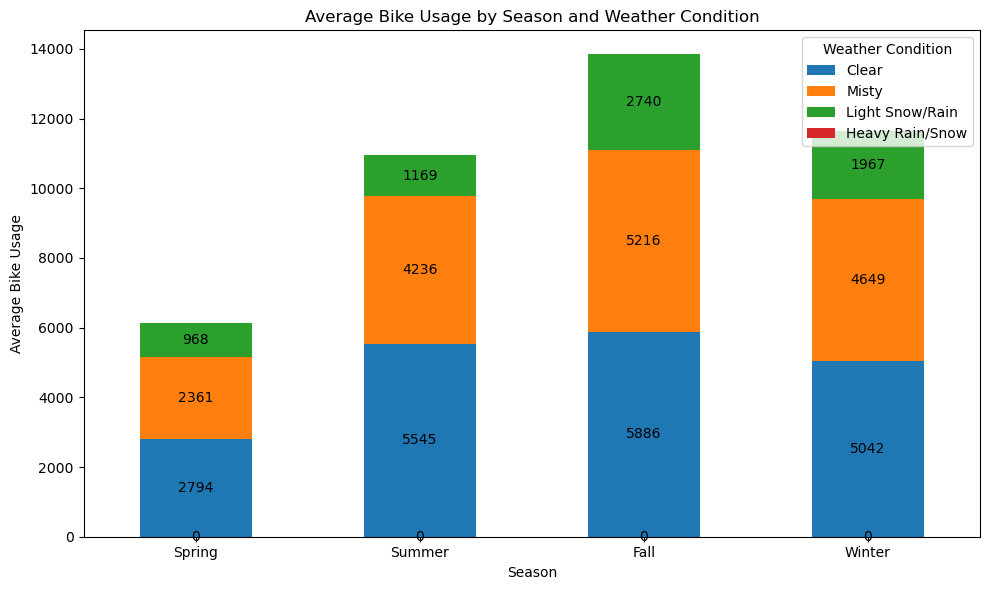

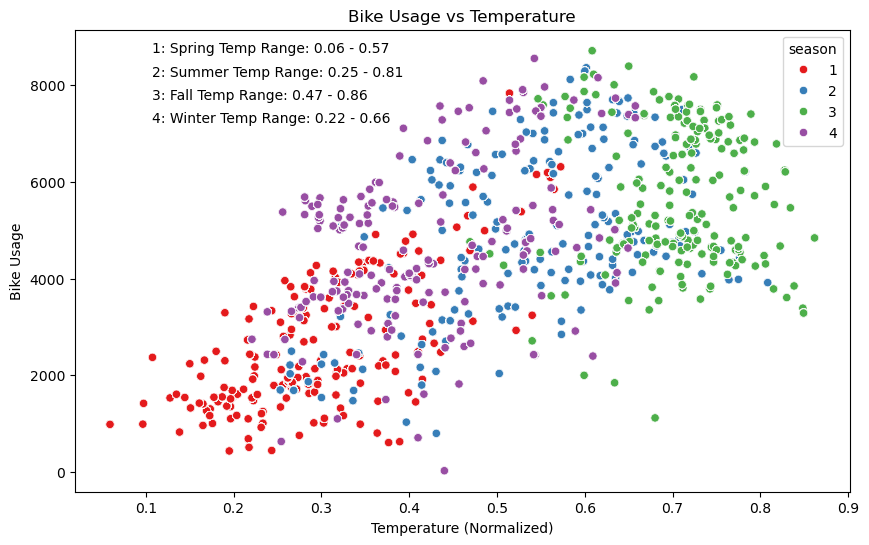

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
season_weather_trend = merged_df.groupby(['season', 'weathersit_day'])['cnt_day'].mean().unstack()
bars = season_weather_trend.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
for container in bars.containers:
    bars.bar_label(container, fmt='%.0f', label_type='center')
ax.set_title('Average Bike Usage by Season and Weather Condition')
ax.set_xlabel('Season')
ax.set_ylabel('Average Bike Usage')
ax.set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)
ax.legend(['Clear', 'Misty', 'Light Snow/Rain', 'Heavy Rain/Snow'], title='Weather Condition', loc='upper right')
plt.tight_layout()
plt.show()
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='temp_day', y='cnt_day', hue='season', palette='Set1', ax=ax)
spring_range = (merged_df[merged_df['season'] == 1]['temp_day'].min(), merged_df[merged_df['season'] == 1]['temp_day'].max())
summer_range = (merged_df[merged_df['season'] == 2]['temp_day'].min(), merged_df[merged_df['season'] == 2]['temp_day'].max())
fall_range = (merged_df[merged_df['season'] == 3]['temp_day'].min(), merged_df[merged_df['season'] == 3]['temp_day'].max())
winter_range = (merged_df[merged_df['season'] == 4]['temp_day'].min(), merged_df[merged_df['season'] == 4]['temp_day'].max())
ax.text(0.1, 0.95, f"1: Spring Temp Range: {spring_range[0]:.2f} - {spring_range[1]:.2f}", transform=ax.transAxes, fontsize=10)
ax.text(0.1, 0.90, f"2: Summer Temp Range: {summer_range[0]:.2f} - {summer_range[1]:.2f}", transform=ax.transAxes, fontsize=10)
ax.text(0.1, 0.85, f"3: Fall Temp Range: {fall_range[0]:.2f} - {fall_range[1]:.2f}", transform=ax.transAxes, fontsize=10)
ax.text(0.1, 0.80, f"4: Winter Temp Range: {winter_range[0]:.2f} - {winter_range[1]:.2f}", transform=ax.transAxes, fontsize=10)
ax.set_title('Bike Usage vs Temperature')
ax.set_xlabel('Temperature (Normalized)')
ax.set_ylabel('Bike Usage')
plt.show()

**Insight:**
- **Penggunaan Sepeda Paling Tinggi pada Musim Panas dan Musim Gugur:**
    - Musim **Summer** menunjukkan penggunaan sepeda tertinggi dengan **5545** sepeda pada cuaca cerah. Meskipun terjadi penurunan saat cuaca berkabut menjadi **4236**, penggunaan sepeda tetap signifikan.
    - Musim **Fall** juga memiliki angka tinggi dengan **5886** sepeda saat cuaca cerah dan **5216** saat berkabut.
- **Cuaca Ekstrem Mengurangi Penggunaan Sepeda:**
    - Penggunaan sepeda menurun drastis saat cuaca buruk, seperti **Heavy Rain/Snow** di mana penggunaan sepeda mencapai **0** di semua musim. Ini menunjukkan bahwa orang-orang lebih memilih tidak bersepeda dalam kondisi cuaca ekstrem.
- **Cuaca Berkabut Masih Mendukung Penggunaan Sepeda:**
    - Meski ada penurunan, cuaca berkabut (Misty) di musim **Summer** dan **Fall** tetap menghasilkan angka penggunaan sepeda yang cukup besar, yaitu masing-masing **4236** dan **5216**, menunjukkan bahwa cuaca berkabut masih bisa diterima oleh sebagian pengendara.
- **Rentang Suhu Ideal Berbeda di Setiap Musim:**
    - Pada **musim Spring**, rentang suhu ideal untuk bersepeda berkisar antara **0.06 - 0.57**, yang lebih rendah karena masih cenderung dingin.
    - Di **musim Summer**, rentang suhu ideal meningkat menjadi **0.25 - 0.81**, mencerminkan cuaca yang lebih hangat dan nyaman untuk aktivitas bersepeda.
    - **Musim Fall** menunjukkan rentang suhu yang cukup bervariasi antara **0.47 - 0.86**, yang menunjukkan masih banyak orang yang tetap bersepeda meskipun suhu mulai menurun.
    - Pada **musim Winter**, rentang suhu turun menjadi **0.22 - 0.66**, yang lebih dingin, sehingga berpotensi mengurangi aktivitas bersepeda.
- **Pengaruh Suhu Dingin terhadap Penggunaan Sepeda:**
    - Pada musim **Winter**, penggunaan sepeda lebih rendah karena suhu yang lebih dingin, terlihat dari rentang suhu **0.22 - 0.66**. Suhu yang dingin menjadi faktor penghalang bagi sebagian besar orang untuk bersepeda.

## Conclusion

- **Conclution pertanyaan 1 :** **Pengaruh Musim dan Cuaca terhadap Penggunaan Sepeda**karena penggunaan sepeda sangat dipengaruhi oleh musim dan kondisi cuaca. Dari analisis data terbaru, terlihat bahwa cuaca cerah pada **musim panas (Summer)** dan **musim gugur (Fall)** adalah kondisi yang paling mendukung penggunaan sepeda, dengan jumlah rata-rata pengguna yang jauh lebih tinggi dibandingkan musim lainnya. Pada **musim Summer**, penggunaan sepeda mencapai **5545** pengguna saat cuaca cerah, dan **5886** pada **musim Fall**. Sebaliknya, cuaca ekstrem seperti **hujan deras atau salju berat** hampir menghentikan sepenuhnya aktivitas bersepeda, dengan **0** penggunaan sepeda dalam kondisi tersebut. Ini menunjukkan bahwa orang lebih memilih bersepeda saat cuaca nyaman dan cenderung menghindari kondisi cuaca yang buruk.
- **Conclution pertanyaan 2 :** **Rentang Suhu Ideal untuk Bersepeda:** karena rentang suhu juga memiliki pengaruh besar terhadap penggunaan sepeda. Suhu yang lebih hangat di **musim Summer** dengan rentang **0.25 - 0.81** mendorong lebih banyak orang untuk bersepeda. Di **musim Fall**, meskipun suhu mulai menurun dengan rentang **0.47 - 0.86**, banyak orang yang masih aktif bersepeda. Sebaliknya, di **musim Winter**, suhu yang lebih dingin dengan rentang **0.22 - 0.66** menyebabkan penurunan penggunaan sepeda, mengindikasikan bahwa semakin dingin cuaca, semakin sedikit orang yang tertarik untuk bersepeda.
- **Conclution pertanyaan 3 :** Secara keseluruhan, dari kedua analisis di atas, dapat disimpulkan bahwa faktor eksternal seperti **musim dan cuaca** sangat mempengaruhi tren penggunaan sepeda. Cuaca cerah dan suhu yang hangat adalah kondisi yang ideal untuk mendorong lebih banyak orang bersepeda, sementara kondisi cuaca ekstrem atau suhu dingin mengurangi keinginan orang untuk bersepeda. Program atau kampanye yang mendorong penggunaan sepeda dalam kondisi cuaca yang kurang ideal dapat menjadi strategi untuk meningkatkan jumlah pengguna sepeda secara keseluruhan, terutama di musim dengan suhu yang lebih rendah.

# Export Main Data ke CSV

In [23]:
day_data_cleaned = df_day[['dteday', 'season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']]
day_data_cleaned.columns = ['date', 'season', 'year', 'month', 'weekday', 'working_day', 'weather', 'temperature', 'humidity', 'windspeed', 'total_rentals']
day_data_cleaned = day_data_cleaned.dropna()  
day_data_cleaned = day_data_cleaned.drop_duplicates()  
print(day_data_cleaned.head())

         date  season  year  month  weekday  working_day  weather  \
0  2011-01-01       1     0      1        6            0        2   
1  2011-01-02       1     0      1        0            0        2   
2  2011-01-03       1     0      1        1            1        1   
3  2011-01-04       1     0      1        2            1        1   
4  2011-01-05       1     0      1        3            1        1   

   temperature  humidity  windspeed  total_rentals  
0     0.344167  0.805833   0.160446            985  
1     0.363478  0.696087   0.248539            801  
2     0.196364  0.437273   0.248309           1349  
3     0.200000  0.590435   0.160296           1562  
4     0.226957  0.436957   0.186900           1600  


In [24]:
weather_mapping = {1: 'Clear', 2: 'Misty', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
day_data_cleaned['weather_description'] = day_data_cleaned['weather'].map(weather_mapping)
hour_data_cleaned = df_hour[['dteday', 'hr', 'temp', 'hum', 'windspeed', 'cnt']]
hour_data_cleaned.columns = ['date', 'hour', 'temperature_hourly', 'humidity_hourly', 'windspeed_hourly', 'hourly_rentals']
hour_data_cleaned = hour_data_cleaned.dropna()
hour_data_cleaned = hour_data_cleaned.drop_duplicates()
print(day_data_cleaned.head())

         date  season  year  month  weekday  working_day  weather  \
0  2011-01-01       1     0      1        6            0        2   
1  2011-01-02       1     0      1        0            0        2   
2  2011-01-03       1     0      1        1            1        1   
3  2011-01-04       1     0      1        2            1        1   
4  2011-01-05       1     0      1        3            1        1   

   temperature  humidity  windspeed  total_rentals weather_description  
0     0.344167  0.805833   0.160446            985               Misty  
1     0.363478  0.696087   0.248539            801               Misty  
2     0.196364  0.437273   0.248309           1349               Clear  
3     0.200000  0.590435   0.160296           1562               Clear  
4     0.226957  0.436957   0.186900           1600               Clear  


In [25]:
hour_data_cleaned = df_hour[['dteday', 'hr', 'temp', 'hum', 'windspeed', 'cnt']]
hour_data_cleaned.columns = ['date', 'hour', 'temperature_hourly', 'humidity_hourly', 'windspeed_hourly', 'hourly_rentals']
print(hour_data_cleaned.head())

         date  hour  temperature_hourly  humidity_hourly  windspeed_hourly  \
0  2011-01-01     0                0.24             0.81               0.0   
1  2011-01-01     1                0.22             0.80               0.0   
2  2011-01-01     2                0.22             0.80               0.0   
3  2011-01-01     3                0.24             0.75               0.0   
4  2011-01-01     4                0.24             0.75               0.0   

   hourly_rentals  
0              16  
1              40  
2              32  
3              13  
4               1  


In [26]:
main_data = pd.merge(day_data_cleaned, hour_data_cleaned, on='date', how='inner')
main_data = main_data.dropna()
main_data = main_data.drop_duplicates()
print(main_data.head())

         date  season  year  month  weekday  working_day  weather  \
0  2011-01-01       1     0      1        6            0        2   
1  2011-01-01       1     0      1        6            0        2   
2  2011-01-01       1     0      1        6            0        2   
3  2011-01-01       1     0      1        6            0        2   
4  2011-01-01       1     0      1        6            0        2   

   temperature  humidity  windspeed  total_rentals weather_description  hour  \
0     0.344167  0.805833   0.160446            985               Misty     0   
1     0.344167  0.805833   0.160446            985               Misty     1   
2     0.344167  0.805833   0.160446            985               Misty     2   
3     0.344167  0.805833   0.160446            985               Misty     3   
4     0.344167  0.805833   0.160446            985               Misty     4   

   temperature_hourly  humidity_hourly  windspeed_hourly  hourly_rentals  
0                0.24        

In [27]:
main_data.to_csv('dashboard/main_data.csv', index=False)
print("Data has been successfully exported to 'main_data.csv'.")

Data has been successfully exported to 'main_data.csv'.
